# IMPORTS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, f_classif

# Prt a

##LOAD DATASET from sklearn

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# Load data
df=fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

##show df

In [ ]:
df

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

##train and test data for PCA

In [ ]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

## Flatten images to create feature vectors

In [ ]:
X_flattened = X.reshape(X.shape[0], -1)

In [ ]:
X_flattened.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

## Visualize a sample image

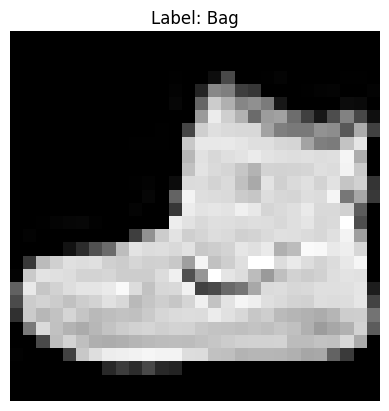

In [ ]:
# Define class names
class_names = [ 'Ankle boot','T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag']

plt.imshow(X[0], cmap='gray')
plt.title(f"Label: {class_names[y[0]]}")
plt.axis('off')
plt.show()

##add noise


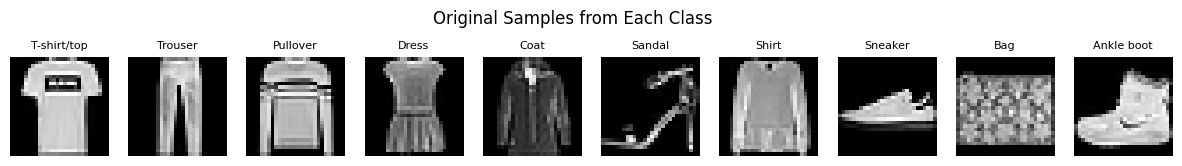

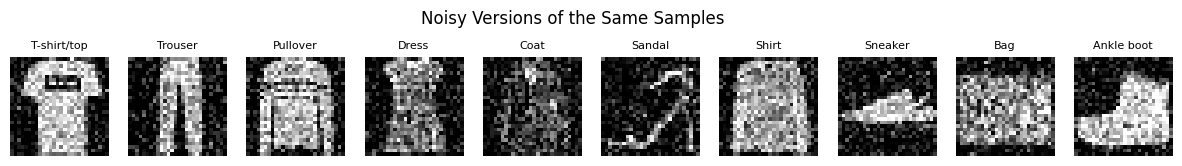

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# Class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Step 1: pick one sample from each class
sample_indices = []
for i in range(10):
    idx = np.where(y == i)[0][0]
    sample_indices.append(idx)

X_samples = X[sample_indices]
y_samples = y[sample_indices]

# Step 2: Display original samples
plt.figure(figsize=(15, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_samples[i], cmap='gray')
    plt.title(class_names[y_samples[i]], fontsize=8)
    plt.axis('off')
plt.suptitle("Original Samples from Each Class")
plt.show()

# Step 3: Add Gaussian noise to the entire dataset
X_normalized = X / 255.0
noise_factor = 0.2
X_noisy = X_normalized + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_normalized.shape)
X_noisy = np.clip(X_noisy, 0., 1.)

# Select noisy versions of the same 10 samples
X_samples_noisy = X_noisy[sample_indices]

# Step 4: Display noisy samples
plt.figure(figsize=(15, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_samples_noisy[i], cmap='gray')
    plt.title(class_names[y_samples[i]], fontsize=8)
    plt.axis('off')
plt.suptitle("Noisy Versions of the Same Samples")
plt.show()


#part b

## pca from scratch

In [ ]:
# Flatten noisy images for PCA
X_noisy_flat = X_noisy.reshape(70000, 784)  # shape = (70000, 784)
# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_noisy_flat)

# Display the shape of the standardized data
print(f"Standardized Data Shape: {X_standardized.shape}")

Standardized Data Shape: (70000, 784)


In [ ]:
# Compute the covariance matrix
# For large datasets, it's more efficient to compute the covariance matrix using numpy's dot product
n_samples = X_standardized.shape[0]
cov_matrix = np.dot(X_standardized.T, X_standardized) / (n_samples - 1)

# Display the shape of the covariance matrix
print(f"Covariance Matrix Shape: {cov_matrix.shape}")

# Display the covariance matrix
print(f"Covariance Matrix: \n{cov_matrix}")

Covariance Matrix Shape: (784, 784)
Covariance Matrix: 
[[ 1.00001429e+00  5.88394037e-03 -3.61844501e-04 ... -1.83484935e-03
  -2.09689106e-03 -2.26806780e-03]
 [ 5.88394037e-03  1.00001429e+00 -4.49557125e-03 ...  8.82200828e-03
  -3.55274910e-03  1.36559612e-03]
 [-3.61844501e-04 -4.49557125e-03  1.00001429e+00 ... -1.00407208e-04
   4.62987799e-03  4.82027802e-03]
 ...
 [-1.83484935e-03  8.82200828e-03 -1.00407208e-04 ...  1.00001429e+00
   6.56877490e-02  5.75454181e-03]
 [-2.09689106e-03 -3.55274910e-03  4.62987799e-03 ...  6.56877490e-02
   1.00001429e+00  1.01831106e-02]
 [-2.26806780e-03  1.36559612e-03  4.82027802e-03 ...  5.75454181e-03
   1.01831106e-02  1.00001429e+00]]


In [ ]:
# Compute eigenvalues and eigenvectors using Singular Value Decomposition (SVD)
U, S, VT = np.linalg.svd(X_standardized, full_matrices=False)

# Eigenvalues are the square of singular values divided by (n_samples - 1)
eig_values = (S ** 2) / (n_samples - 1)

# Eigenvectors are the transpose of V from SVD
eig_vectors = VT.T

# Display the shape of eigenvalues and eigenvectors
print(f"Eigenvalues Shape: {eig_values.shape}")
print(f"Eigenvectors Shape: {eig_vectors.shape}")

# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(eig_values[i], eig_vectors[:, i]) for i in range(len(eig_values))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Extract the sorted eigenvalues and eigenvectors
sorted_eig_values = np.array([eig_pair[0] for eig_pair in eig_pairs])
sorted_eig_vectors = np.array([eig_pair[1] for eig_pair in eig_pairs]).T

# Display the top 10 eigenvalues
print("Top 10 Eigenvalues:")
for i in range(10):
    print(f"Eigenvalue {i+1}: {sorted_eig_values[i]}")

Eigenvalues Shape: (784,)
Eigenvectors Shape: (784, 784)
Top 10 Eigenvalues:
Eigenvalue 1: 134.55489938468818
Eigenvalue 2: 84.47419329164934
Eigenvalue 3: 31.406463696296875
Eigenvalue 4: 27.347386896714966
Eigenvalue 5: 20.69495323876517
Eigenvalue 6: 18.333577835997158
Eigenvalue 7: 14.282124015054668
Eigenvalue 8: 11.70136398412195
Eigenvalue 9: 8.278740109192992
Eigenvalue 10: 6.947967879444253


In [ ]:
# Select the top k eigenvectors (here we choose k=2 for visualization)
k = 2
matrix_w = sorted_eig_vectors[:, :k]

# Project the standardized data onto the new feature space
X_pca = X_standardized.dot(matrix_w)

# Create a DataFrame with the projected data
principal_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(k)])
principal_df['label'] = y

# Display the first 5 rows of the projected data
print("Projected Data (first 5 samples):")
print(principal_df.head())

Projected Data (first 5 samples):
         PC1        PC2  label
0  -0.032947 -18.849126      9
1  14.087237   5.086278      0
2  -9.291419  10.064323      0
3  -0.913219  10.141090      3
4   7.470260  11.625475      0


Explained Variance Ratio for Top 10 Components:
PC1: 0.1716
PC2: 0.1077
PC3: 0.0401
PC4: 0.0349
PC5: 0.0264
PC6: 0.0234
PC7: 0.0182
PC8: 0.0149
PC9: 0.0106
PC10: 0.0089


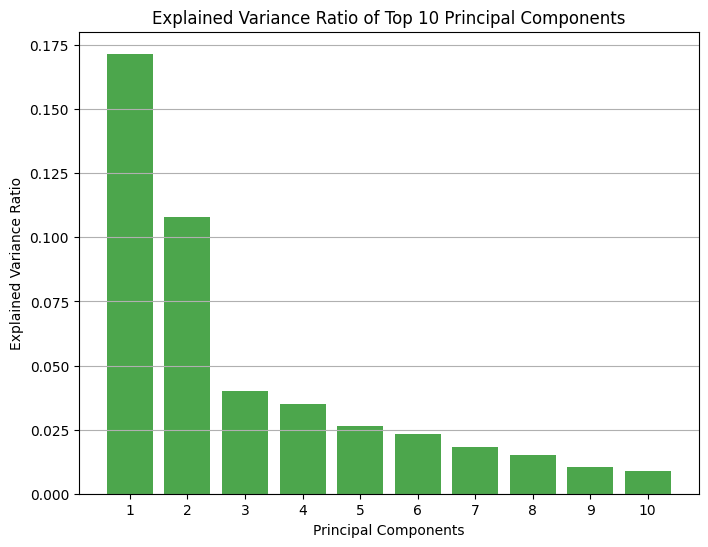

In [ ]:
# Compute the explained variance ratio
explained_variance_ratio = sorted_eig_values / np.sum(sorted_eig_values)

# Display the explained variance ratio for the top 10 components
print("Explained Variance Ratio for Top 10 Components:")
for i in range(10):
    print(f"PC{i+1}: {explained_variance_ratio[i]:.4f}")

# Plot the explained variance ratio for the top 10 components
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
components = np.arange(1, 11)
plt.bar(components, explained_variance_ratio[:10], alpha=0.7, color='green')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Top 10 Principal Components')
plt.xticks(components)
plt.grid(axis='y')
plt.show()

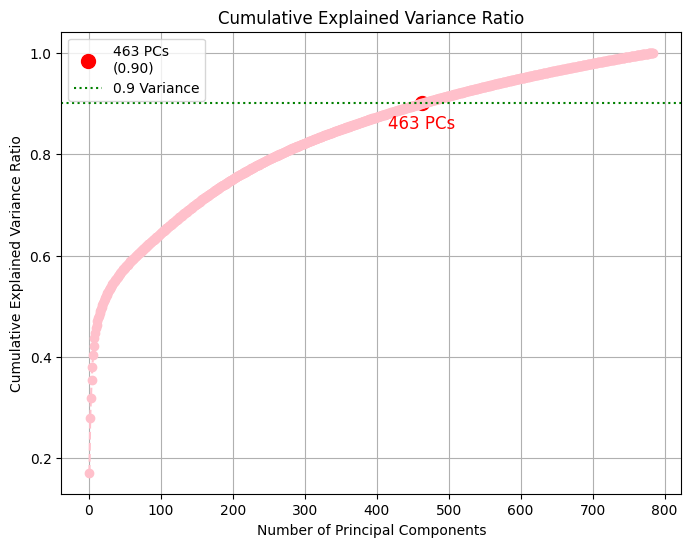

تعداد مؤلفه‌های اصلی لازم برای رسیدن به حداقل 90٪ واریانس: 463


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ف explained_variance_ratio قس
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)


k_90 = np.argmax(cumulative_variance_ratio >= 0.9) + 1
value_90 = cumulative_variance_ratio[k_90 - 1]

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--', color='pink')


plt.scatter(k_90, value_90, color='red', s=100, label=f'{k_90} PCs\n({value_90:.2f})')


plt.axhline(y=0.9, color='green', linestyle=':', label='0.9 Variance')

plt.text(k_90, value_90-0.05, f"{k_90} PCs", color='red', fontsize=12, ha='center')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.show()

print(f"تعداد مؤلفه‌های اصلی لازم برای رسیدن به حداقل 90٪ واریانس: {k_90}")


#part c

In [ ]:
# Import PCA from scikit-learn
from sklearn.decomposition import PCA

# Initialize PCA with the desired number of components
k = 2  # Number of principal components
pca = PCA(n_components=k)

# Fit PCA on the standardized data
X_pca_sklearn = pca.fit_transform(X_standardized)

# Create a DataFrame with the projected data
principal_df_sklearn = pd.DataFrame(X_pca_sklearn, columns=[f'PC{i+1}' for i in range(k)])
principal_df_sklearn['label'] = y

# Display the explained variance ratio
print("Explained Variance Ratio by scikit-learn PCA:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.4f}")

Explained Variance Ratio by scikit-learn PCA:
PC1: 0.1716
PC2: 0.1077


## Plot the projected data using scikit-learn PCA

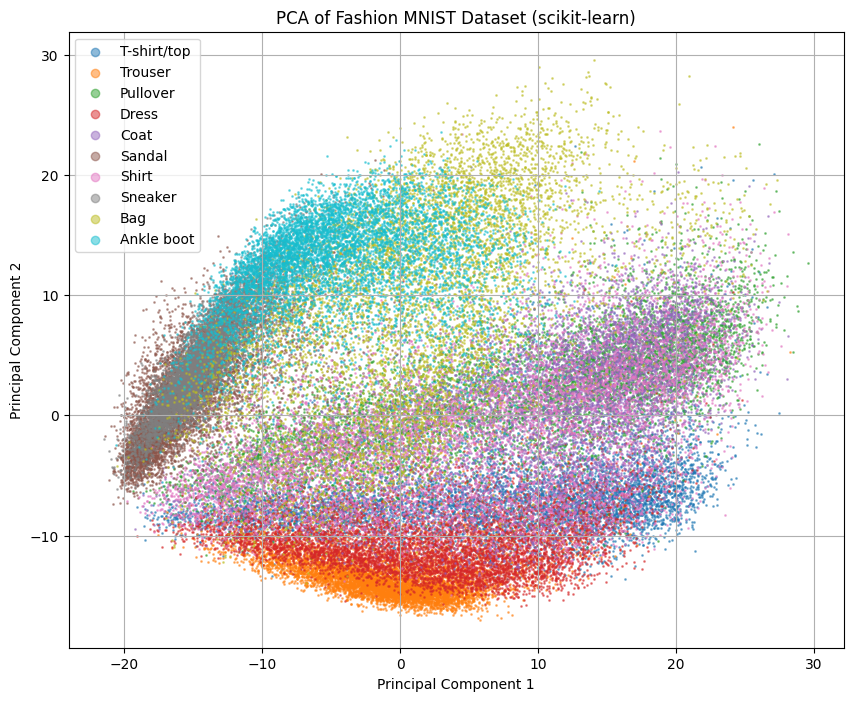

In [ ]:

plt.figure(figsize=(10, 8))

# No sampling - use the entire dataset
for label in np.unique(principal_df_sklearn['label']):
    label_indices = principal_df_sklearn['label'] == label
    plt.scatter(principal_df_sklearn.loc[label_indices, 'PC1'],
                principal_df_sklearn.loc[label_indices, 'PC2'],
                s=1, alpha=0.5, label=class_names[label])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Fashion MNIST Dataset (scikit-learn)')
plt.legend(markerscale=6)
plt.grid()
plt.show()


#part d

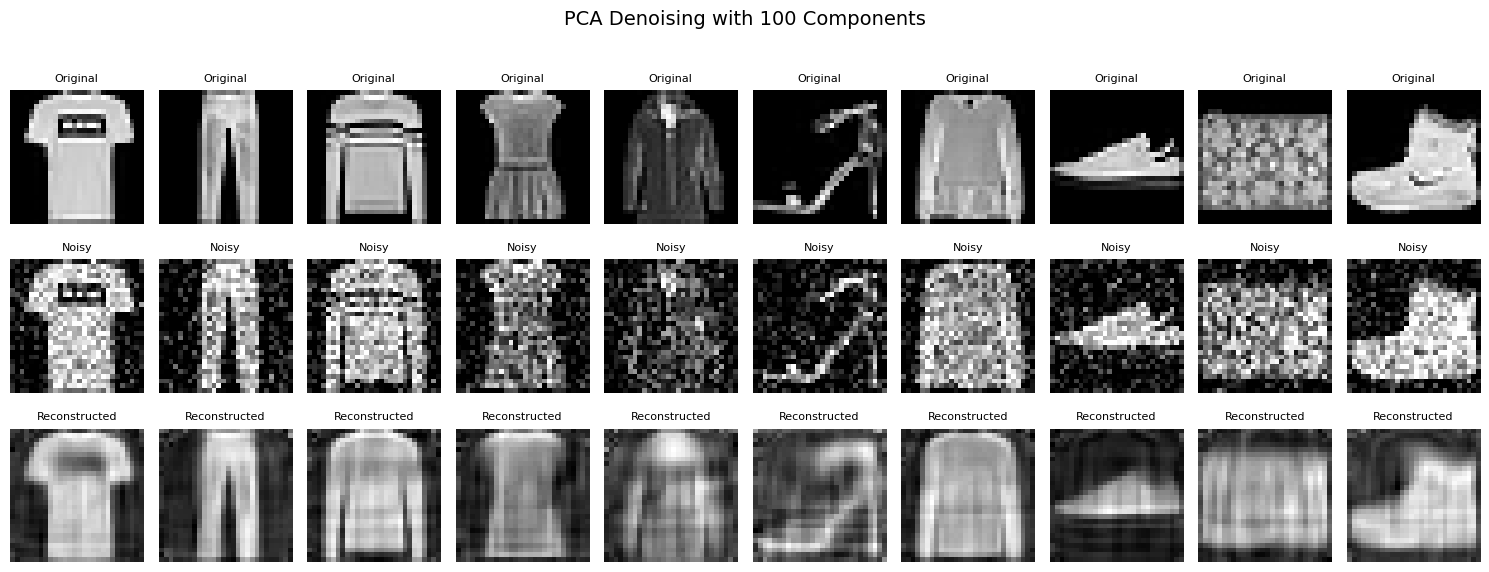

In [ ]:
# Choose number of components for denoising (e.g., 100 is a good starting point)
k_denoise = 100
matrix_w_denoise = sorted_eig_vectors[:, :k_denoise]

# Project the noisy standardized data to PCA subspace
X_pca_denoised = X_standardized.dot(matrix_w_denoise)

# Reconstruct the standardized data from PCA space
X_reconstructed_standardized = X_pca_denoised.dot(matrix_w_denoise.T)

# Inverse transform the standardization
X_reconstructed = scaler.inverse_transform(X_reconstructed_standardized)

# Reshape back to image format
X_reconstructed_images = X_reconstructed.reshape(-1, 28, 28)

# Select reconstructed versions of the same 10 samples
X_samples_reconstructed = X_reconstructed_images[sample_indices]

# ------------------------- Plot All Together -------------------------

plt.figure(figsize=(15, 6))

for i in range(10):
    # Original
    plt.subplot(3, 10, i + 1)
    plt.imshow(X_samples[i], cmap='gray')
    plt.title("Original", fontsize=8)
    plt.axis('off')

    # Noisy
    plt.subplot(3, 10, i + 11)
    plt.imshow(X_samples_noisy[i], cmap='gray')
    plt.title("Noisy", fontsize=8)
    plt.axis('off')

    # Reconstructed
    plt.subplot(3, 10, i + 21)
    plt.imshow(X_samples_reconstructed[i], cmap='gray')
    plt.title("Reconstructed", fontsize=8)
    plt.axis('off')

plt.suptitle(f"PCA Denoising with {k_denoise} Components", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()


#part E

##LDA

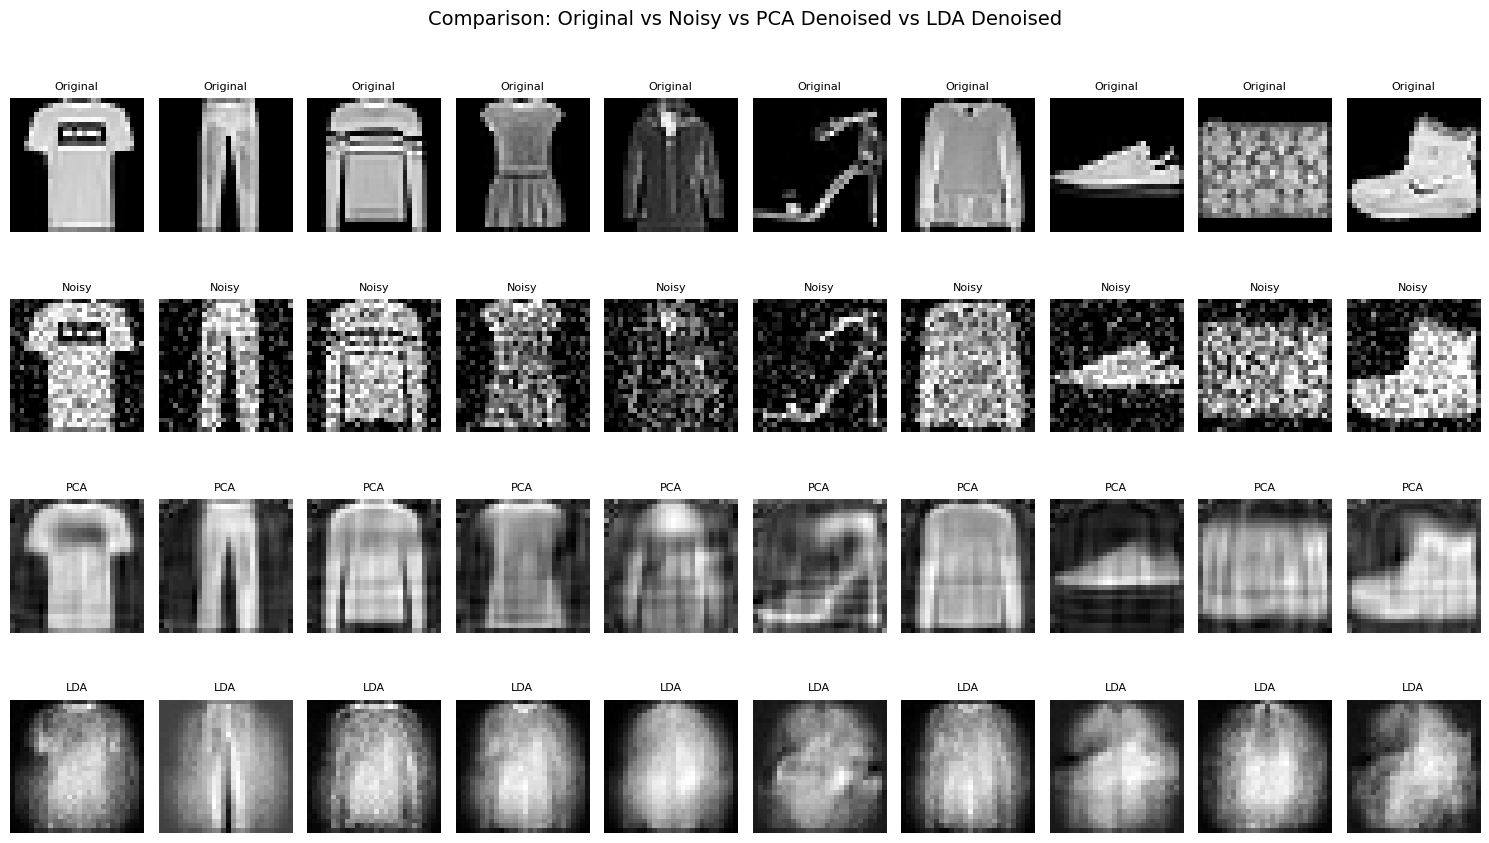

In [ ]:


# Step 1: Fit LDA on standardized noisy data
lda = LinearDiscriminantAnalysis(n_components=9)
X_lda = lda.fit_transform(X_standardized, y)

# Step 2: Reconstruct back to original space using pseudo-inverse
X_reconstructed_lda_std = X_lda.dot(lda.scalings_.T)

# Step 3: Inverse transform the standardization
X_reconstructed_lda = scaler.inverse_transform(X_reconstructed_lda_std)

# Step 4: Reshape to images
X_reconstructed_lda_images = X_reconstructed_lda.reshape(-1, 28, 28)
X_samples_lda = X_reconstructed_lda_images[sample_indices]

# Compare PCA vs LDA

plt.figure(figsize=(15, 9))

for i in range(10):
    # Original
    plt.subplot(4, 10, i + 1)
    plt.imshow(X_samples[i], cmap='gray')
    plt.title("Original", fontsize=8)
    plt.axis('off')

    # Noisy
    plt.subplot(4, 10, i + 11)
    plt.imshow(X_samples_noisy[i], cmap='gray')
    plt.title("Noisy", fontsize=8)
    plt.axis('off')

    # PCA Reconstructed
    plt.subplot(4, 10, i + 21)
    plt.imshow(X_samples_reconstructed[i], cmap='gray')
    plt.title("PCA", fontsize=8)
    plt.axis('off')

    # LDA Reconstructed
    plt.subplot(4, 10, i + 31)
    plt.imshow(X_samples_lda[i], cmap='gray')
    plt.title("LDA", fontsize=8)
    plt.axis('off')

plt.suptitle("Comparison: Original vs Noisy vs PCA Denoised vs LDA Denoised", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

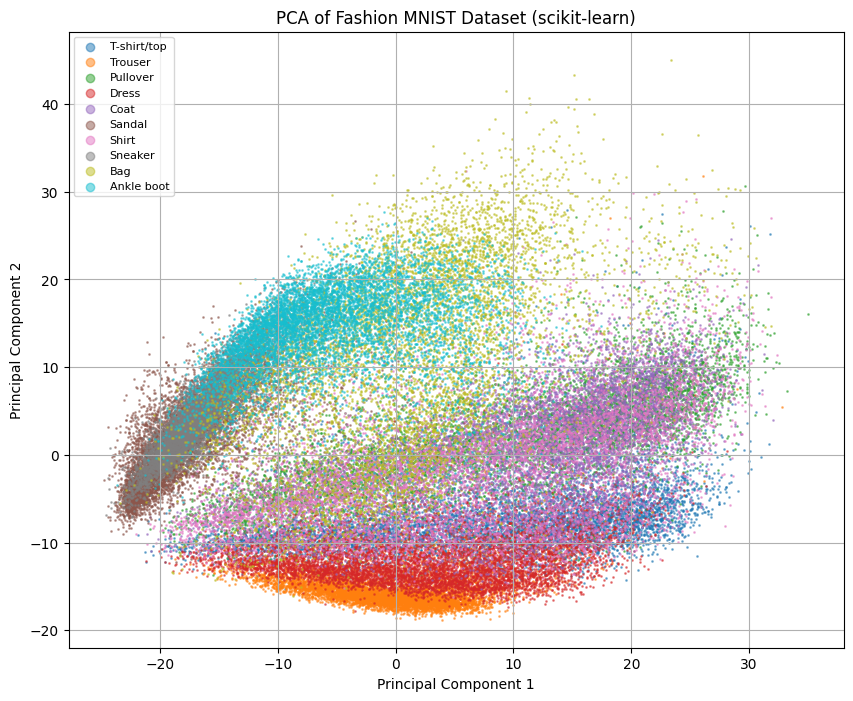

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd

# Load Fashion MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X = np.concatenate([X_train, X_test], axis=0).reshape(-1, 28*28)
y = np.concatenate([y_train, y_test], axis=0)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------- PCA Projection ----------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame for plotting
principal_df_sklearn = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
principal_df_sklearn['label'] = y

# Plot PCA result
plt.figure(figsize=(10, 8))
for label in np.unique(principal_df_sklearn['label']):
    label_indices = principal_df_sklearn['label'] == label
    plt.scatter(principal_df_sklearn.loc[label_indices, 'PC1'],
                principal_df_sklearn.loc[label_indices, 'PC2'],
                s=1, alpha=0.5, label=class_names[label])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Fashion MNIST Dataset (scikit-learn)')
plt.legend(markerscale=6, fontsize=8)
plt.grid()
plt.show()


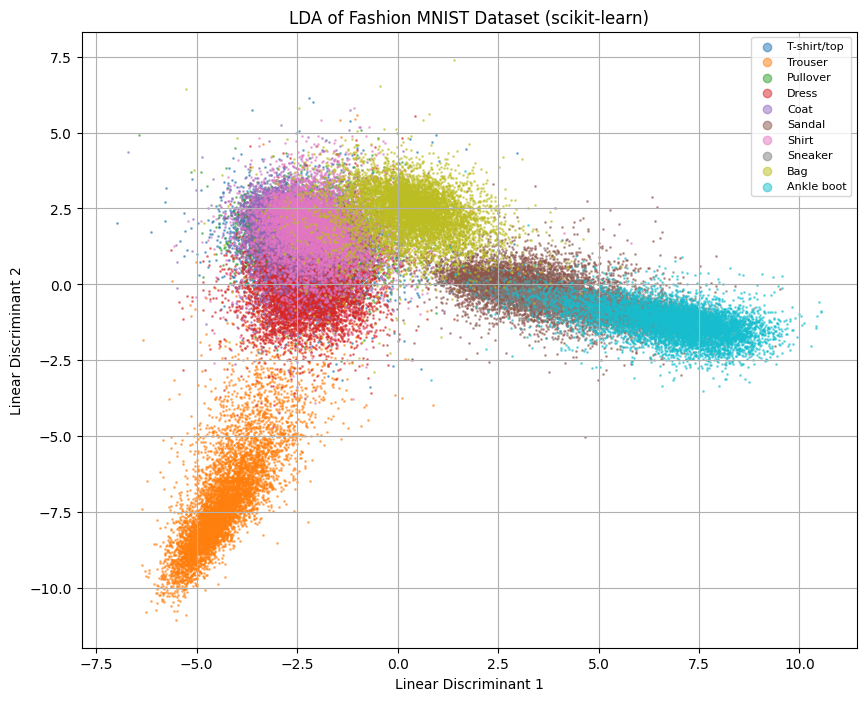

In [ ]:
# ---------------------- LDA Projection ----------------------
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Create DataFrame for plotting
lda_df = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
lda_df['label'] = y

# Plot LDA result
plt.figure(figsize=(10, 8))
for label in np.unique(lda_df['label']):
    label_indices = lda_df['label'] == label
    plt.scatter(lda_df.loc[label_indices, 'LD1'],
                lda_df.loc[label_indices, 'LD2'],
                s=1, alpha=0.5, label=class_names[label])

plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.title('LDA of Fashion MNIST Dataset (scikit-learn)')
plt.legend(markerscale=6, fontsize=8)
plt.grid()
plt.show()

#PART F

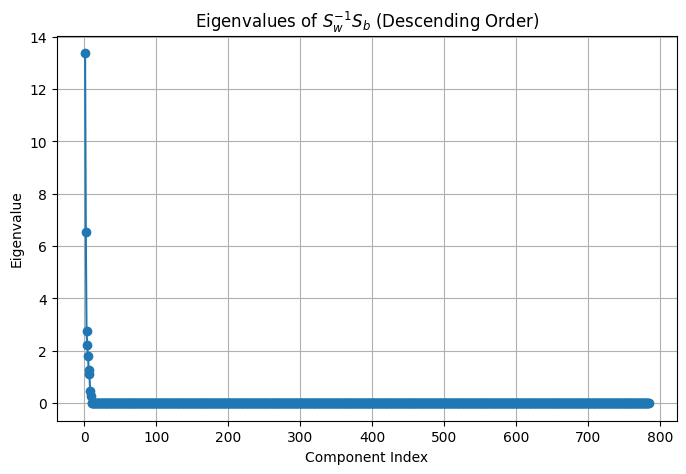

In [ ]:
# --------- Compute and Plot Eigenvalues of Sw^-1 Sb for LDA ---------
import numpy as np
import matplotlib.pyplot as plt

# Compute overall mean
mean_overall = np.mean(X_scaled, axis=0)
n_features = X_scaled.shape[1]
classes = np.unique(y)

# Initialize scatter matrices
S_w = np.zeros((n_features, n_features))
S_b = np.zeros((n_features, n_features))

# Compute within-class and between-class scatter matrices
for c in classes:
    X_c = X_scaled[y == c]
    mean_c = np.mean(X_c, axis=0)
    n_c = X_c.shape[0]

    S_w += (X_c - mean_c).T @ (X_c - mean_c)
    mean_diff = (mean_c - mean_overall).reshape(-1, 1)
    S_b += n_c * (mean_diff @ mean_diff.T)

# Compute eigenvalues of Sw^-1 Sb
eigvals, _ = np.linalg.eig(np.linalg.pinv(S_w).dot(S_b))
eigvals = np.real(eigvals)
sorted_eigvals = np.sort(eigvals)[::-1]

# Plot eigenvalues in descending order
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(sorted_eigvals)+1), sorted_eigvals, marker='o')
plt.title('Eigenvalues of $S_w^{-1} S_b$ (Descending Order)')
plt.xlabel('Component Index')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

## complete Analysis for LDA and PCA

In [ ]:


def complete_lda_analysis(X_scaled, y, class_names):
    """
    Complete LDA analysis including eigenvalues, scatter matrices, and discriminant directions
    """

    print("=== Complete LDA Eigenvalue Analysis ===\n")

    # Compute overall mean
    mean_overall = np.mean(X_scaled, axis=0)
    n_features = X_scaled.shape[1]
    n_samples = X_scaled.shape[0]
    classes = np.unique(y)
    n_classes = len(classes)

    print(f"Dataset dimensions: {n_samples} samples × {n_features} features")
    print(f"Number of classes: {n_classes}")
    print(f"Maximum LDA components: {min(n_classes-1, n_features)} = {min(n_classes-1, n_features)}")

    # Initialize scatter matrices
    S_w = np.zeros((n_features, n_features))  # Within-class scatter
    S_b = np.zeros((n_features, n_features))  # Between-class scatter

    # Compute class statistics
    class_stats = {}
    for c in classes:
        X_c = X_scaled[y == c]
        mean_c = np.mean(X_c, axis=0)
        n_c = X_c.shape[0]

        class_stats[c] = {
            'mean': mean_c,
            'size': n_c,
            'proportion': n_c / n_samples
        }

        # Within-class scatter
        S_w += (X_c - mean_c).T @ (X_c - mean_c)

        # Between-class scatter
        mean_diff = (mean_c - mean_overall).reshape(-1, 1)
        S_b += n_c * (mean_diff @ mean_diff.T)

    print(f"\nClass sizes: {[class_stats[c]['size'] for c in classes]}")
    print("Class proportions:", [f"{class_stats[c]['proportion']:.3f}" for c in classes])

    # Compute eigenvalues and eigenvectors
    try:
        # Method 1: Direct computation (your approach)
        S_w_inv = np.linalg.pinv(S_w)
        eigvals_direct, eigvecs_direct = np.linalg.eig(S_w_inv @ S_b)

        # Sort by eigenvalues in descending order
        idx = np.argsort(np.real(eigvals_direct))[::-1]
        eigvals_sorted = np.real(eigvals_direct[idx])
        eigvecs_sorted = np.real(eigvecs_direct[:, idx])

        # Keep only non-zero eigenvalues
        non_zero_mask = eigvals_sorted > 1e-10
        eigvals_nonzero = eigvals_sorted[non_zero_mask]
        eigvecs_nonzero = eigvecs_sorted[:, non_zero_mask]

        print(f"\nNumber of non-zero eigenvalues: {len(eigvals_nonzero)}")
        print(f"Top 5 eigenvalues: {eigvals_nonzero[:5]}")

    except np.linalg.LinAlgError:
        print("Warning: Direct eigenvalue computation failed (singular matrix)")
        eigvals_nonzero = np.array([])

    # Method 2: Scikit-learn comparison
    lda_sklearn = LinearDiscriminantAnalysis()
    lda_sklearn.fit(X_scaled, y)

    # Create comprehensive visualization
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    # 1. Eigenvalue plot (your original)
    if len(eigvals_nonzero) > 0:
        axes[0,0].plot(range(1, len(eigvals_nonzero)+1), eigvals_nonzero, 'bo-', markersize=8, linewidth=2)
        axes[0,0].set_xlabel('Component Index')
        axes[0,0].set_ylabel('Eigenvalue')
        axes[0,0].set_title(f'Eigenvalues of $S_w^{{-1}} S_b$ (Top {len(eigvals_nonzero)})')
        axes[0,0].grid(True, alpha=0.3)
        axes[0,0].set_yscale('log')  # Log scale to see smaller eigenvalues

    # 2. Eigenvalue ratios and cumulative importance
    if len(eigvals_nonzero) > 0:
        eigenval_ratios = eigvals_nonzero / np.sum(eigvals_nonzero)
        cumulative_ratios = np.cumsum(eigenval_ratios)

        axes[0,1].bar(range(1, len(eigenval_ratios)+1), eigenval_ratios, alpha=0.7, color='skyblue')
        axes[0,1].plot(range(1, len(cumulative_ratios)+1), cumulative_ratios, 'ro-', linewidth=2, markersize=6)
        axes[0,1].set_xlabel('Component Index')
        axes[0,1].set_ylabel('Proportion of Discriminative Power')
        axes[0,1].set_title('Eigenvalue Proportions and Cumulative Sum')
        axes[0,1].grid(True, alpha=0.3)
        axes[0,1].legend(['Cumulative', 'Individual'])

    # 3. Comparison with scikit-learn explained variance ratios
    sklearn_ratios = lda_sklearn.explained_variance_ratio_
    axes[0,2].bar(range(1, len(sklearn_ratios)+1), sklearn_ratios, alpha=0.7, color='lightgreen')
    axes[0,2].set_xlabel('Component Index')
    axes[0,2].set_ylabel('Explained Variance Ratio')
    axes[0,2].set_title('Scikit-learn LDA Explained Variance')
    axes[0,2].grid(True, alpha=0.3)

    # 4. Scatter matrix visualizations (heatmaps of small subsets)
    # Visualize a small subset of the scatter matrices for interpretation
    subset_size = 50  # Show 50x50 subset for visualization

    im1 = axes[1,0].imshow(S_w[:subset_size, :subset_size], cmap='viridis', aspect='auto')
    axes[1,0].set_title('Within-Class Scatter Matrix $S_w$ (50×50 subset)')
    axes[1,0].set_xlabel('Feature Index')
    axes[1,0].set_ylabel('Feature Index')
    plt.colorbar(im1, ax=axes[1,0], fraction=0.046, pad=0.04)

    im2 = axes[1,1].imshow(S_b[:subset_size, :subset_size], cmap='plasma', aspect='auto')
    axes[1,1].set_title('Between-Class Scatter Matrix $S_b$ (50×50 subset)')
    axes[1,1].set_xlabel('Feature Index')
    axes[1,1].set_ylabel('Feature Index')
    plt.colorbar(im2, ax=axes[1,1], fraction=0.046, pad=0.04)

    # 5. Eigenvalue comparison with PCA
    from sklearn.decomposition import PCA
    pca = PCA()
    pca.fit(X_scaled)
    pca_eigenvals = pca.explained_variance_[:9]  # Top 9 for comparison

    if len(eigvals_nonzero) > 0:
        x_comp = range(1, min(len(eigvals_nonzero), len(pca_eigenvals)) + 1)
        axes[1,2].semilogy(x_comp, eigvals_nonzero[:len(x_comp)], 'bo-', label='LDA Eigenvalues', markersize=8)
        axes[1,2].semilogy(x_comp, pca_eigenvals[:len(x_comp)], 'rs-', label='PCA Eigenvalues', markersize=8)
        axes[1,2].set_xlabel('Component Index')
        axes[1,2].set_ylabel('Eigenvalue (log scale)')
        axes[1,2].set_title('LDA vs PCA Eigenvalue Comparison')
        axes[1,2].legend()
        axes[1,2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Detailed analysis
    print(f"\n=== Detailed Eigenvalue Analysis ===")
    if len(eigvals_nonzero) > 0:
        print(f"Largest eigenvalue: {eigvals_nonzero[0]:.4f}")
        print(f"Smallest non-zero eigenvalue: {eigvals_nonzero[-1]:.4f}")
        print(f"Eigenvalue ratio (λ₁/λ₉): {eigvals_nonzero[0]/eigvals_nonzero[-1]:.1f}")

        # Discriminative power analysis
        total_discriminative_power = np.sum(eigvals_nonzero)
        print(f"\nDiscriminative Power Distribution:")
        for i, (eigval, ratio) in enumerate(zip(eigvals_nonzero, eigenval_ratios)):
            print(f"  Component {i+1}: λ={eigval:.4f} ({ratio*100:.1f}% of total power)")

    print(f"\n=== Interpretation ===")
    print("• Large eigenvalues indicate directions with high class separability")
    print("• The first few components capture most discriminative information")
    print("• Rapid eigenvalue decay suggests low intrinsic dimensionality for classification")
    print("• Non-zero eigenvalues limited to min(classes-1, features) = 9")

    return {
        'S_w': S_w,
        'S_b': S_b,
        'eigenvalues': eigvals_nonzero if len(eigvals_nonzero) > 0 else None,
        'eigenvectors': eigvecs_nonzero if len(eigvals_nonzero) > 0 else None,
        'class_stats': class_stats,
        'sklearn_lda': lda_sklearn
    }

def visualize_discriminant_directions(eigvecs, eigvals, class_names, n_components=3):
    """
    Visualize the first few discriminant directions as images
    """
    if eigvecs is None:
        print("No eigenvectors available for visualization")
        return

    fig, axes = plt.subplots(1, min(n_components, eigvecs.shape[1]), figsize=(15, 4))
    if min(n_components, eigvecs.shape[1]) == 1:
        axes = [axes]

    for i in range(min(n_components, eigvecs.shape[1])):
        # Reshape eigenvector to image
        eigvec_img = eigvecs[:, i].reshape(28, 28)

        # Normalize for visualization
        eigvec_img = (eigvec_img - eigvec_img.min()) / (eigvec_img.max() - eigvec_img.min())

        im = axes[i].imshow(eigvec_img, cmap='RdBu_r', aspect='equal')
        axes[i].set_title(f'Discriminant {i+1}\n(λ={eigvals[i]:.2f})')
        axes[i].axis('off')
        plt.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)

    plt.suptitle('Linear Discriminant Directions as Images', fontsize=14)
    plt.tight_layout()
    plt.show()


=== Complete LDA Eigenvalue Analysis ===

Dataset dimensions: 70000 samples × 784 features
Number of classes: 10
Maximum LDA components: 9 = 9

Class sizes: [7000, 7000, 7000, 7000, 7000, 7000, 7000, 7000, 7000, 7000]
Class proportions: ['0.100', '0.100', '0.100', '0.100', '0.100', '0.100', '0.100', '0.100', '0.100', '0.100']

Number of non-zero eigenvalues: 9
Top 5 eigenvalues: [13.36495994  6.52946084  2.75712754  2.20761373  1.80962134]


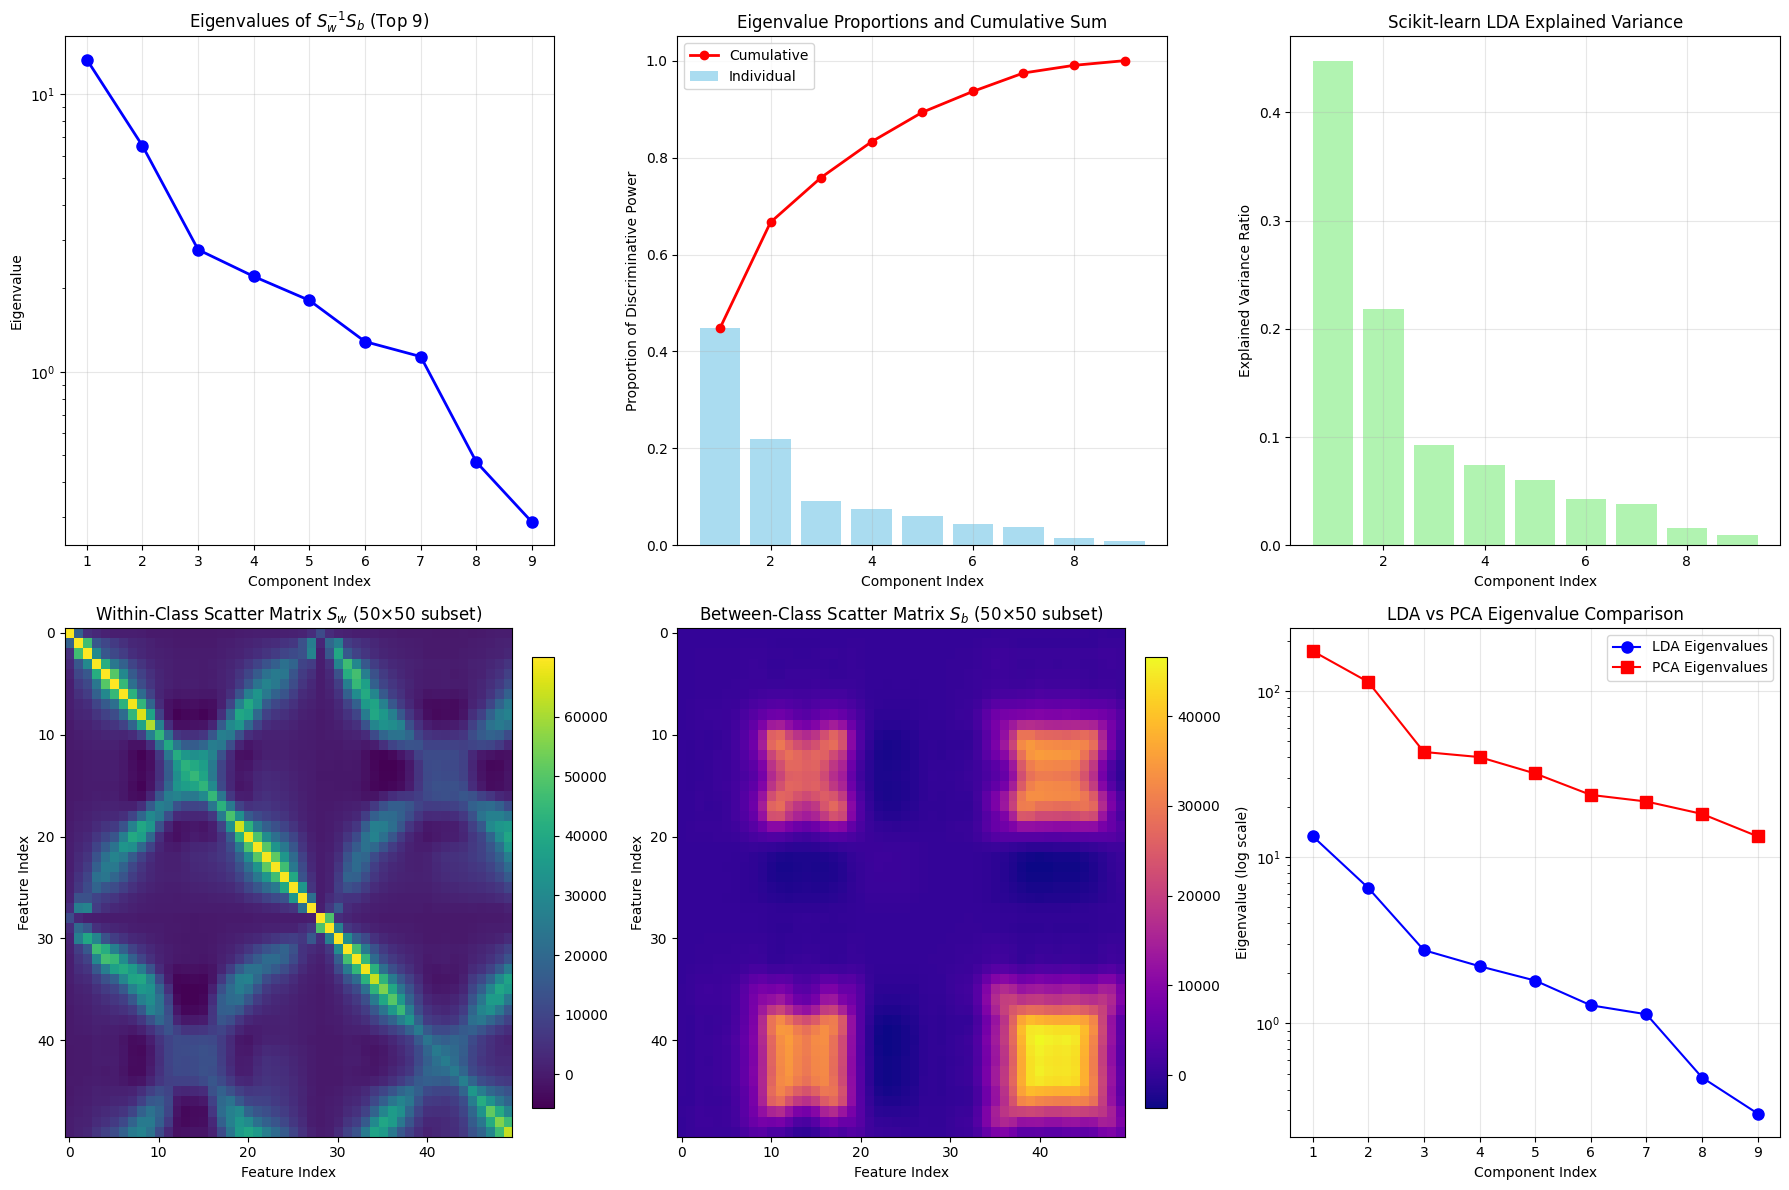


=== Detailed Eigenvalue Analysis ===
Largest eigenvalue: 13.3650
Smallest non-zero eigenvalue: 0.2871
Eigenvalue ratio (λ₁/λ₉): 46.6

Discriminative Power Distribution:
  Component 1: λ=13.3650 (44.8% of total power)
  Component 2: λ=6.5295 (21.9% of total power)
  Component 3: λ=2.7571 (9.2% of total power)
  Component 4: λ=2.2076 (7.4% of total power)
  Component 5: λ=1.8096 (6.1% of total power)
  Component 6: λ=1.2852 (4.3% of total power)
  Component 7: λ=1.1348 (3.8% of total power)
  Component 8: λ=0.4729 (1.6% of total power)
  Component 9: λ=0.2871 (1.0% of total power)

=== Interpretation ===
• Large eigenvalues indicate directions with high class separability
• The first few components capture most discriminative information
• Rapid eigenvalue decay suggests low intrinsic dimensionality for classification
• Non-zero eigenvalues limited to min(classes-1, features) = 9


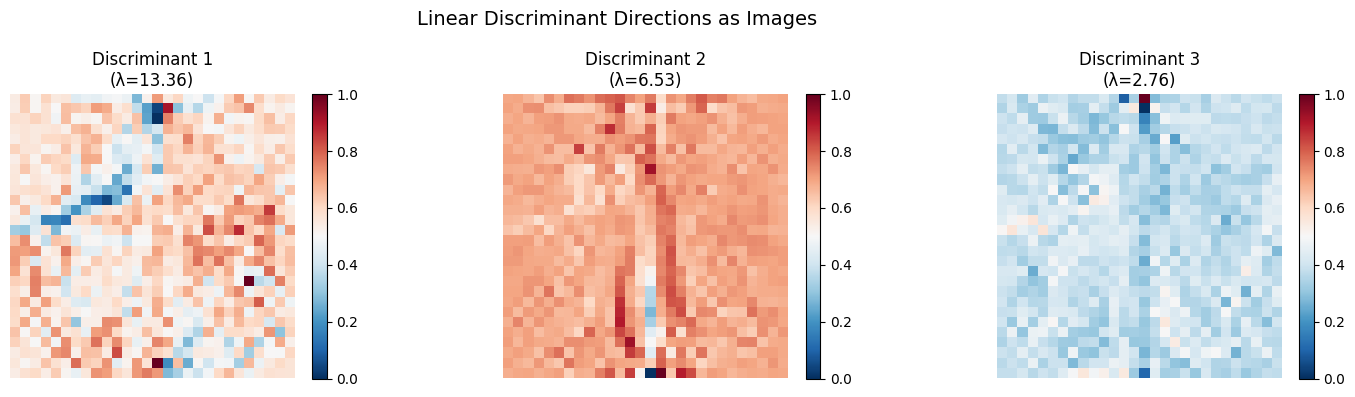

In [ ]:


results = complete_lda_analysis(X_scaled, y, class_names)
visualize_discriminant_directions(results['eigenvectors'], results['eigenvalues'], class_names)

# part G

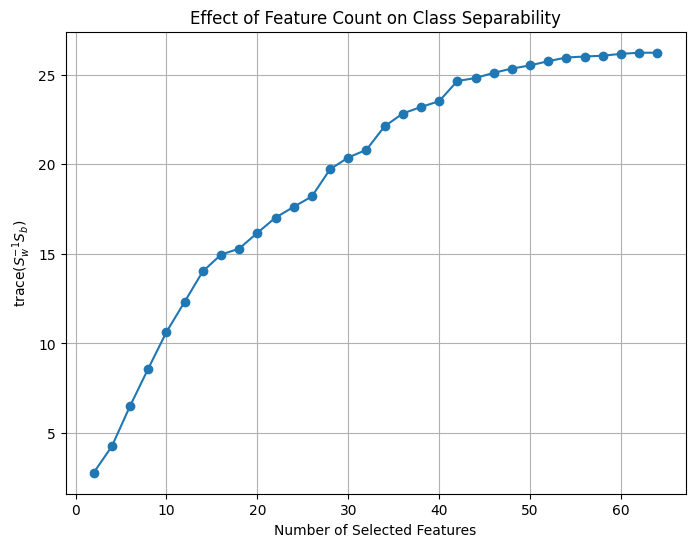

In [ ]:


# استفاده از داده digits برای نمونه؛ شما می‌توانید آن را با داده‌ی خودتان جایگزین کنید
digits = load_digits()
X, y = digits.data, digits.target

# استانداردسازی
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# محدوده‌ای از تعداد ویژگی‌ها برای بررسی
feature_counts = range(2, X.shape[1] + 1, 2)
traces = []

for k in feature_counts:
    # انتخاب k ویژگی برتر با ANOVA
    selector = SelectKBest(score_func=f_classif, k=k)
    X_selected = selector.fit_transform(X_scaled, y)

    # محاسبه‌ی میانگین کلی
    mean_overall = np.mean(X_selected, axis=0)
    classes = np.unique(y)
    n_features = X_selected.shape[1]
    S_w = np.zeros((n_features, n_features))
    S_b = np.zeros((n_features, n_features))

    for c in classes:
        X_c = X_selected[y == c]
        mean_c = np.mean(X_c, axis=0)
        n_c = X_c.shape[0]

        S_w += (X_c - mean_c).T @ (X_c - mean_c)
        mean_diff = (mean_c - mean_overall).reshape(-1, 1)
        S_b += n_c * (mean_diff @ mean_diff.T)

    # محاسبه trace(Sw^-1 Sb)
    Sw_inv_Sb = np.linalg.pinv(S_w) @ S_b
    trace_val = np.trace(Sw_inv_Sb)
    traces.append(trace_val)

# رسم نمودار
plt.figure(figsize=(8, 6))
plt.plot(feature_counts, traces, marker='o')
plt.xlabel("Number of Selected Features")
plt.ylabel("trace($S_w^{-1} S_b$)")
plt.title("Effect of Feature Count on Class Separability")
plt.grid(True)
plt.show()


# part 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
import time
import warnings
warnings.filterwarnings('ignore')

class TSNE:
    """
    Complete t-SNE implementation from scratch
    """

    def __init__(self, n_components=2, perplexity=30.0, learning_rate=200.0,
                 n_iter=1000, random_state=None, verbose=True):
        """
        Initialize t-SNE

        Parameters:
        -----------
        n_components : int, default=2
            Number of dimensions in the embedding
        perplexity : float, default=30.0
            Target perplexity for Gaussian kernels
        learning_rate : float, default=200.0
            Learning rate for gradient descent
        n_iter : int, default=1000
            Number of optimization iterations
        random_state : int, optional
            Random seed for reproducibility
        verbose : bool, default=True
            Whether to print progress
        """
        self.n_components = n_components
        self.perplexity = perplexity
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.random_state = random_state
        self.verbose = verbose

        if random_state is not None:
            np.random.seed(random_state)

    def _compute_pairwise_distances(self, X):
        """Compute pairwise Euclidean distances"""
        n = X.shape[0]
        distances = np.zeros((n, n))

        for i in range(n):
            for j in range(i+1, n):
                dist = np.sqrt(np.sum((X[i] - X[j])**2))
                distances[i, j] = dist
                distances[j, i] = dist

        return distances

    def _compute_gaussian_perplexity(self, distances, beta):
        """
        Compute Gaussian probabilities and perplexity for given beta

        Parameters:
        -----------
        distances : array, shape (n,)
            Distances from one point to all others
        beta : float
            Precision parameter (1 / 2σ²)

        Returns:
        --------
        H : float
            Shannon entropy
        P : array, shape (n,)
            Probabilities
        """
        # Compute probabilities
        P = np.exp(-distances * beta)
        sumP = np.sum(P)

        if sumP == 0:
            H = 0
            P = np.zeros_like(distances)
        else:
            H = np.log(sumP) + beta * np.sum(distances * P) / sumP
            P = P / sumP

        return H, P

    def _search_optimal_beta(self, distances, target_perplexity, tol=1e-5, max_iter=50):
        """
        Binary search for optimal beta to achieve target perplexity
        """
        # Create mask for non-zero distances (excluding self)
        nonzero_mask = distances > 0
        distances_nonzero = distances[nonzero_mask]

        # Initialize binary search bounds
        beta_min = 0
        beta_max = np.inf
        beta = 1.0

        target_entropy = np.log(target_perplexity)

        for _ in range(max_iter):
            # Compute entropy and probabilities for non-zero distances only
            H, P_nonzero = self._compute_gaussian_perplexity(distances_nonzero, beta)

            # Check convergence
            entropy_diff = H - target_entropy
            if abs(entropy_diff) < tol:
                break

            # Update beta using binary search
            if entropy_diff > 0:  # Entropy too high, increase beta
                beta_min = beta
                if beta_max == np.inf:
                    beta *= 2.0
                else:
                    beta = (beta + beta_max) / 2.0
            else:  # Entropy too low, decrease beta
                beta_max = beta
                beta = (beta + beta_min) / 2.0

        # Create full probability array with zeros for self-distance
        P_full = np.zeros_like(distances)
        P_full[nonzero_mask] = P_nonzero

        return beta, P_full

    def _compute_pij_matrix(self, X):
        """
        Compute symmetric probability matrix P in high-dimensional space
        """
        n = X.shape[0]

        # Compute pairwise distances
        if self.verbose:
            print("Computing pairwise distances...")

        distances = self._compute_pairwise_distances(X)

        # Initialize probability matrix
        P = np.zeros((n, n))

        if self.verbose:
            print("Computing Gaussian probabilities...")

        # For each point, find optimal beta and compute probabilities
        for i in range(n):
            if self.verbose and i % 100 == 0:
                print(f"Processing point {i}/{n}")

            # Get distances from point i to all others
            distances_i = distances[i].copy()

            # Find optimal beta for target perplexity and get probabilities
            beta, Pi = self._search_optimal_beta(distances_i, self.perplexity)

            # Set probabilities for row i
            P[i] = Pi

        # Symmetrize probabilities
        P = (P + P.T) / (2.0 * n)

        # Ensure minimum probability to avoid numerical issues
        P = np.maximum(P, 1e-12)

        return P

    def _compute_qij_matrix(self, Y):
        """
        Compute probability matrix Q in low-dimensional space using t-distribution
        """
        n = Y.shape[0]

        # Compute pairwise squared distances
        sum_Y = np.sum(Y**2, axis=1)
        distances_squared = -2.0 * np.dot(Y, Y.T) + sum_Y[:, None] + sum_Y[None, :]

        # Compute Q matrix using t-distribution
        num = 1.0 / (1.0 + distances_squared)
        np.fill_diagonal(num, 0)  # Set diagonal to 0

        Q = num / np.sum(num)

        # Ensure minimum probability to avoid numerical issues
        Q = np.maximum(Q, 1e-12)

        return Q

    def _compute_gradient(self, P, Q, Y):
        """
        Compute gradient of KL divergence with respect to Y
        """
        n = Y.shape[0]

        # Compute PQ difference
        PQ_diff = P - Q

        # Compute gradient
        gradient = np.zeros_like(Y)

        for i in range(n):
            # Compute differences between point i and all others
            diff = Y[i] - Y  # Shape: (n, n_components)

            # Compute distances for t-distribution denominator
            distances_squared = np.sum(diff**2, axis=1)
            inv_distances = 1.0 / (1.0 + distances_squared)

            # Compute gradient for point i
            for j in range(n):
                if i != j:
                    gradient[i] += PQ_diff[i, j] * diff[j] * inv_distances[j]

        return 4.0 * gradient

    def _compute_cost(self, P, Q):
        """Compute KL divergence cost"""
        return np.sum(P * np.log(P / Q))

    def fit_transform(self, X):
        """
        Fit t-SNE model and return embedded coordinates

        Parameters:
        -----------
        X : array, shape (n_samples, n_features)
            Input data

        Returns:
        --------
        Y : array, shape (n_samples, n_components)
            Embedded coordinates
        """
        n, d = X.shape

        if self.verbose:
            print(f"Running t-SNE on {n} samples with {d} features")
            print(f"Perplexity: {self.perplexity}, Learning rate: {self.learning_rate}")

        # Step 1: Compute P matrix in high-dimensional space
        start_time = time.time()
        P = self._compute_pij_matrix(X)

        if self.verbose:
            print(f"P matrix computed in {time.time() - start_time:.2f} seconds")

        # Step 2: Initialize low-dimensional embedding
        Y = np.random.normal(0, 1e-4, (n, self.n_components))

        # Step 3: Optimize using gradient descent
        if self.verbose:
            print("Starting optimization...")

        costs = []

        # Early exaggeration (multiply P by 4 for first iterations)
        P_exaggerated = P * 4.0

        for iteration in range(self.n_iter):
            # Use exaggerated P for first 250 iterations
            P_current = P_exaggerated if iteration < 250 else P

            # Compute Q matrix
            Q = self._compute_qij_matrix(Y)

            # Compute cost
            cost = self._compute_cost(P_current, Q)
            costs.append(cost)

            # Compute gradient
            gradient = self._compute_gradient(P_current, Q, Y)

            # Update Y using gradient descent
            Y = Y - self.learning_rate * gradient

            # Print progress
            if self.verbose and (iteration + 1) % 100 == 0:
                print(f"Iteration {iteration + 1}/{self.n_iter}, Cost: {cost:.4f}")

        if self.verbose:
            print("Optimization completed!")

        self.embedding_ = Y
        self.costs_ = costs

        return Y

def demonstrate_tsne_on_fashion_mnist(X, y, class_names, n_samples=1000):
    """
    Demonstrate t-SNE on Fashion-MNIST data
    """
    print("=== t-SNE Demonstration on Fashion-MNIST ===\n")

    # Subsample data for computational efficiency
    indices = np.random.choice(X.shape[0], n_samples, replace=False)
    X_subset = X[indices]
    y_subset = y[indices]

    print(f"Using {n_samples} samples for demonstration")

    # Apply PCA first for preprocessing (common practice)
    from sklearn.decomposition import PCA

    # Reduce to 50 dimensions first (speeds up t-SNE significantly)
    pca = PCA(n_components=50)
    X_pca = pca.fit_transform(X_subset)

    print(f"PCA preprocessing: {X_subset.shape[1]} → {X_pca.shape[1]} dimensions")
    print(f"PCA explained variance: {sum(pca.explained_variance_ratio_):.3f}")

    # Run our t-SNE implementation
    print("\nRunning t-SNE...")
    tsne = TSNE(n_components=2, perplexity=30, learning_rate=200,
                n_iter=1000, random_state=42, verbose=True)

    Y_tsne = tsne.fit_transform(X_pca)

    # Create visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # 1. t-SNE result
    colors = plt.cm.tab10(np.linspace(0, 1, 10))
    for i, class_name in enumerate(class_names):
        mask = y_subset == i
        if np.any(mask):
            axes[0,0].scatter(Y_tsne[mask, 0], Y_tsne[mask, 1],
                             c=[colors[i]], s=20, alpha=0.7, label=class_name)

    axes[0,0].set_title('t-SNE Embedding')
    axes[0,0].set_xlabel('t-SNE 1')
    axes[0,0].set_ylabel('t-SNE 2')
    axes[0,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[0,0].grid(True, alpha=0.3)

    # 2. Cost function evolution
    axes[0,1].plot(tsne.costs_)
    axes[0,1].set_title('t-SNE Cost Function Evolution')
    axes[0,1].set_xlabel('Iteration')
    axes[0,1].set_ylabel('KL Divergence')
    axes[0,1].grid(True, alpha=0.3)

    # 3. PCA comparison (first 2 components)
    pca_2d = PCA(n_components=2)
    Y_pca = pca_2d.fit_transform(X_subset)

    for i, class_name in enumerate(class_names):
        mask = y_subset == i
        if np.any(mask):
            axes[1,0].scatter(Y_pca[mask, 0], Y_pca[mask, 1],
                             c=[colors[i]], s=20, alpha=0.7, label=class_name)

    axes[1,0].set_title('PCA Comparison (2D)')
    axes[1,0].set_xlabel('PC1')
    axes[1,0].set_ylabel('PC2')
    axes[1,0].grid(True, alpha=0.3)

    # 4. LDA comparison
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    lda = LinearDiscriminantAnalysis(n_components=2)
    Y_lda = lda.fit_transform(X_subset, y_subset)

    for i, class_name in enumerate(class_names):
        mask = y_subset == i
        if np.any(mask):
            axes[1,1].scatter(Y_lda[mask, 0], Y_lda[mask, 1],
                             c=[colors[i]], s=20, alpha=0.7, label=class_name)

    axes[1,1].set_title('LDA Comparison (2D)')
    axes[1,1].set_xlabel('LD1')
    axes[1,1].set_ylabel('LD2')
    axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return Y_tsne, Y_pca, Y_lda, tsne

# Example usage:
# Assuming you have X_scaled, y, and class_names from previous parts
# Y_tsne, Y_pca, Y_lda, tsne_model = demonstrate_tsne_on_fashion_mnist(X_scaled, y, class_names, n_samples=1000)

=== t-SNE Demonstration on Fashion-MNIST ===

Using 1000 samples for demonstration
PCA preprocessing: 64 → 50 dimensions
PCA explained variance: 0.987

Running t-SNE...
Running t-SNE on 1000 samples with 50 features
Perplexity: 30, Learning rate: 200
Computing pairwise distances...
Computing Gaussian probabilities...
Processing point 0/1000
Processing point 100/1000
Processing point 200/1000
Processing point 300/1000
Processing point 400/1000
Processing point 500/1000
Processing point 600/1000
Processing point 700/1000
Processing point 800/1000
Processing point 900/1000
P matrix computed in 4.71 seconds
Starting optimization...
Iteration 100/1000, Cost: 14.6709
Iteration 200/1000, Cost: 14.0734
Iteration 300/1000, Cost: 1.3284
Iteration 400/1000, Cost: 1.0807
Iteration 500/1000, Cost: 0.9704
Iteration 600/1000, Cost: 0.9036
Iteration 700/1000, Cost: 0.8575
Iteration 800/1000, Cost: 0.8232
Iteration 900/1000, Cost: 0.7963
Iteration 1000/1000, Cost: 0.7746
Optimization completed!


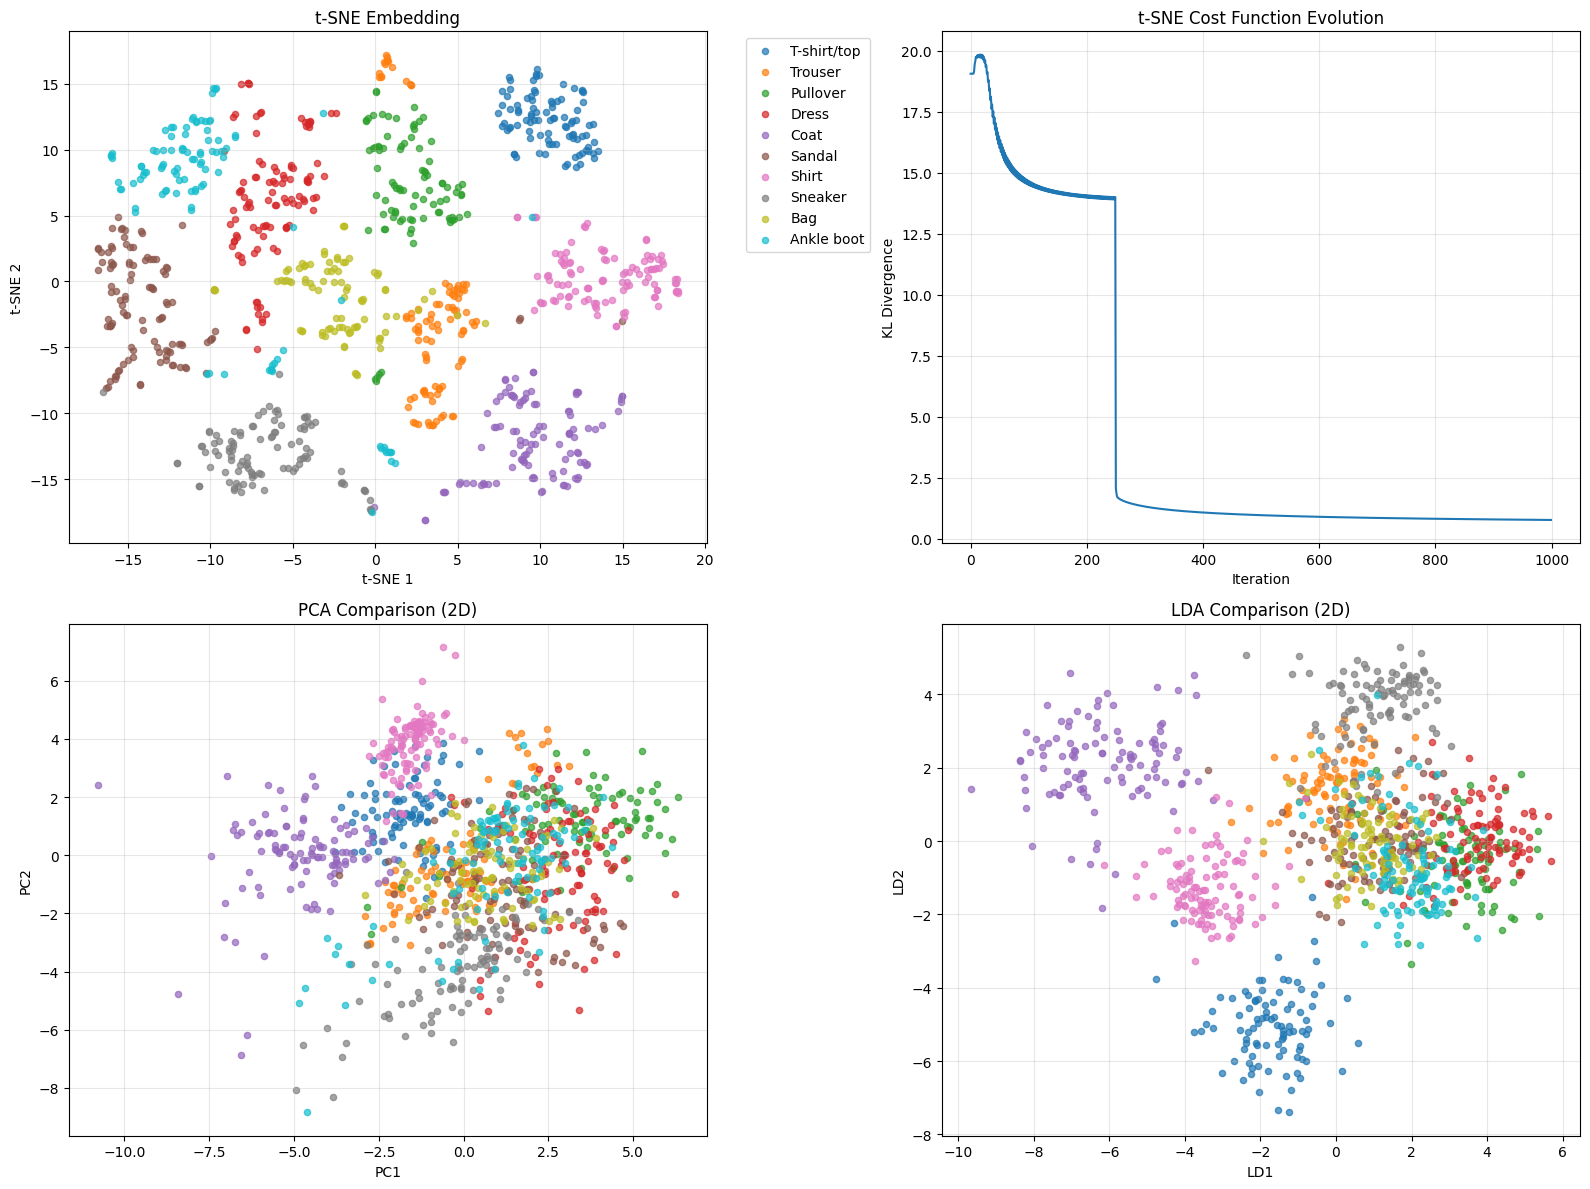

In [ ]:
# Example usage:
# Assuming you have X_scaled, y, and class_names from previous parts
Y_tsne, Y_pca, Y_lda, tsne_model = demonstrate_tsne_on_fashion_mnist(X_scaled, y, class_names, n_samples=1000)
